# **Autoencoder lineal implementado con PCA**

autoencoder lineal (al ser lineal añadir más capas no aporta nada por lo que hay solo entrada - oculta - salida) --> totalmente conectadas con tres capas con funcion de ativación de identidad

**Importación de librerías**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist, fashion_mnist
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go

**Definición de funciones auxiliares**

In [ ]:
def plot_image(image, cmap="binary"):
  plt.imshow(image, cmap=cmap)
  plt.axis("off")

def plot_images(X, cmap="binary", cols=10, widthsize=12):
  rows = int(np.ceil(len(X)/cols))
  plt.figure(figsize=(widthsize, widthsize/cols*rows))
  cont = 1
  for image in X:
    plt.subplot(rows,cols,cont)
    plot_image(image)
    cont = cont + 1

def plot_original_vs_reconstruida(X_original, X_reconstruida):
  for imagen_orig, imagen_rec in zip(X_original, X_reconstruida):
    plt.figure(figsize=(2,1))
    plt.subplot(1,2,1)
    plot_image(imagen_orig)
    plt.title("Original", fontsize=10)
    plt.subplot(1,2,2)
    plot_image(imagen_rec)
    plt.title("Reconstruida", fontsize=10)

def show_ests(y, title=None):
  clases, counts = np.unique(y, return_counts=True)
  plt.figure(figsize=(7,1.5))
  plt.bar(clases, counts)
  if title:
      plt.title(title, fontsize=18)
  plt.xticks(clases)

def show_error(error):
  img = np.zeros((error.shape[0],error.shape[1],3))
  img[:,:,1] = np.clip(error, 0, 1)
  img[:,:,2] = np.clip(error, 0, 1)

  img[:,:,0] = -np.clip(error, -1, 0)
  img[:,:,1] = img[:,:,1] - np.clip(error, -1, 0)

  plt.imshow(1-img**2, vmin=0, vmax=1)
  plt.axis("off")

def show_errors(errors, cols=10, widthsize=12):
  rows = int(np.ceil(len(errors)/cols))
  plt.figure(figsize=(widthsize, widthsize/cols*rows))
  cont = 1
  for error in errors:
    plt.subplot(rows,cols,cont)
    show_error(error)
    cont = cont + 1

def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-latest.min.js?noext',
            },
          });
        </script>
        '''))

**Carga de datos**

In [ ]:
#(X_trval, y_trval), (X_test, y_test) = mnist.load_data()
(X_trval, y_trval), (X_test, y_test) = fashion_mnist.load_data()

X_train, X_valid = X_trval[:-5000], X_trval[-5000:]
y_train, y_valid = y_trval[:-5000], y_trval[-5000:]

**Estadísticas de las clases**

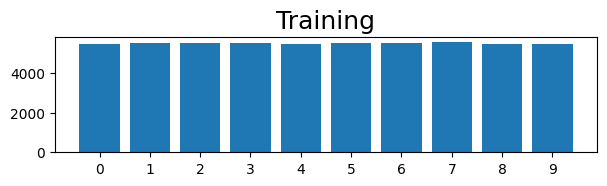

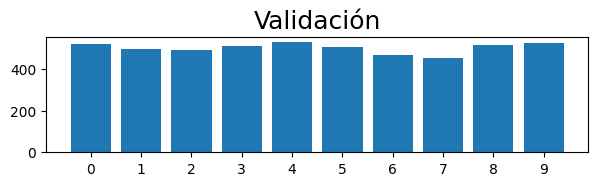

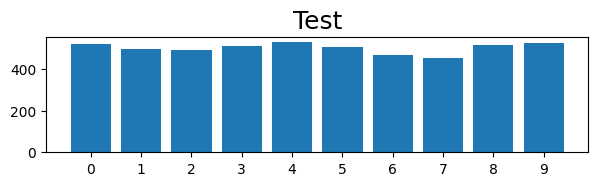

In [ ]:
show_ests(y_train, title="Training")
show_ests(y_valid, title="Validación")
show_ests(y_valid, title="Test")

In [ ]:
print()
print(np.unique(y_valid))
print(np.unique(y_train))


[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


**Chequeao de dimensionaes de datos**

In [ ]:
X_train.shape

(55000, 28, 28)

**Normalización**

In [ ]:
X_train.min(), X_train.max()

(0, 255)

In [ ]:
X_train = X_train.astype('float32') / 255
X_valid = X_valid.astype('float32') / 255
X_test = X_test.astype('float32') / 255
print(X_train.shape)
print(X_test.shape)

(55000, 28, 28)
(10000, 28, 28)


In [ ]:
X_train.min(), X_train.max()

(0.0, 1.0)

**Se muestran 100 imágenes al azar**

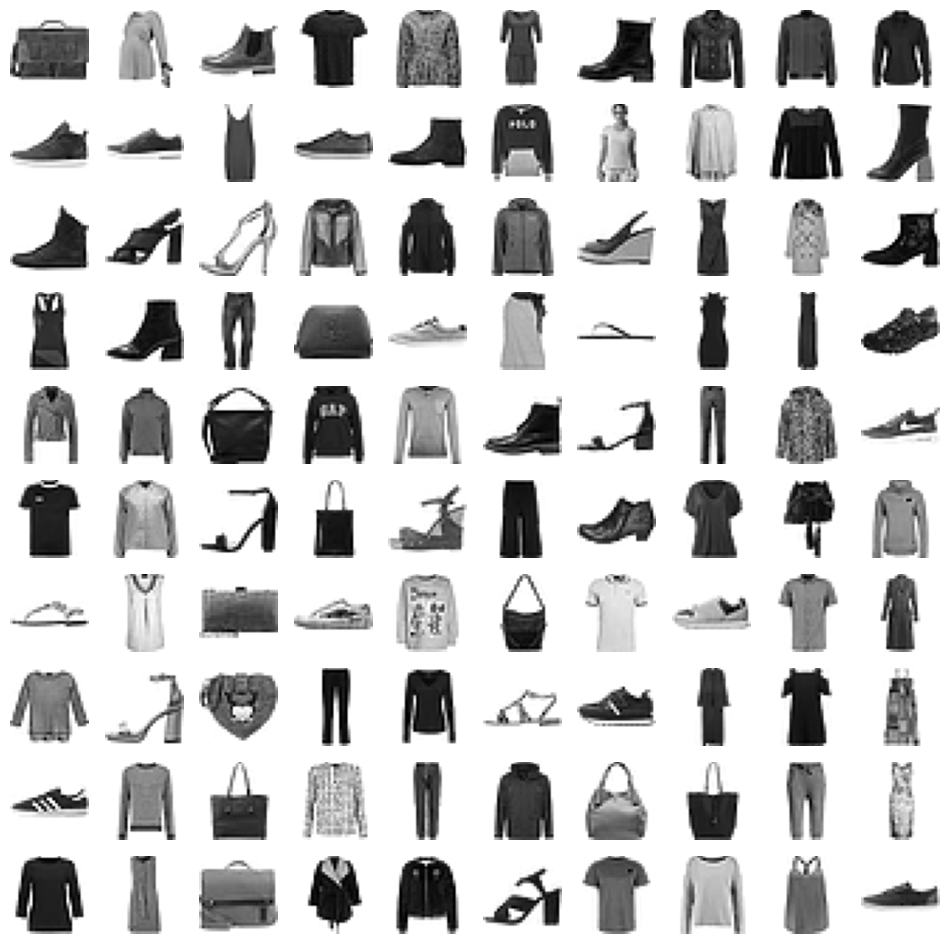

In [ ]:
inds = np.random.randint(0, len(X_train), 100)
plot_images(X_train[inds])

## **Definición del Autoencoder basado en PCA**

In [ ]:
from sklearn.decomposition import PCA

class mi_ae():
  def __init__(self, n_components):
    self.pca = PCA(n_components=n_components)

  def fit(self, X):
    self.data_size = X.shape[1:]
    self.pca.fit(X.reshape((len(X),-1)))

  def encode(self, X):
    return self.pca.transform(X.reshape((len(X),-1)))

  def decode(self, X):
    aux = (len(X),) + self.data_size
    return self.pca.inverse_transform(X).reshape(aux)

In [ ]:
X_train.shape

(55000, 28, 28)

In [ ]:
n_components = 50 #cuantos más componenetes menos comprime y mas fiel a la realidad el resultado
ae = mi_ae(n_components)
ae.fit(X_train)

In [ ]:
# Comprimo las imágenes con el encoder:
X_test_enc = ae.encode(X_test)

In [ ]:
X_test_enc.shape

(10000, 50)

In [ ]:
X_test_enc[:5]

array([[-5.832943  ,  2.5530317 , -1.0557024 ,  0.3214413 ,  0.04544926,
        -0.43013704, -1.0383394 , -1.0658103 ,  1.0948863 , -1.5868468 ,
        -0.37761843,  0.4144898 ,  0.47834566, -0.2788901 , -0.16920835,
         0.12173384, -0.41013968,  0.5282265 ,  0.0479843 , -0.13277918,
         0.8964393 , -0.15576398,  0.7796477 , -0.59419125, -0.6131028 ,
        -0.43137285, -0.3649679 ,  0.3364418 ,  0.42121157, -0.24582565,
         0.24665985, -0.10409331,  0.33996576, -0.21954016,  0.09481168,
         0.36673445, -1.2558858 , -0.89049053, -0.54427546, -0.11399657,
         0.27322328,  0.27020136, -0.3355108 ,  0.04144952,  0.07913014,
         0.07313662,  0.1903044 ,  0.08907554,  0.03003504,  0.21310869],
       [ 7.3355236 ,  4.2509503 ,  3.0294924 ,  0.16797936, -1.7644142 ,
        -0.48710394,  0.21540976,  1.7852337 , -0.09840453, -2.470272  ,
         2.108716  , -0.32774952, -0.43966737, -0.66130066,  1.1695275 ,
        -0.1497983 ,  1.0875974 ,  1.4867938 , -0.

In [ ]:
ae.decode(X_test_enc).shape
#reconstruir la imagen que habia comprimido

(10000, 28, 28)

**Visualización del dataset en las 2 primeras dimensiones del espacio latente**

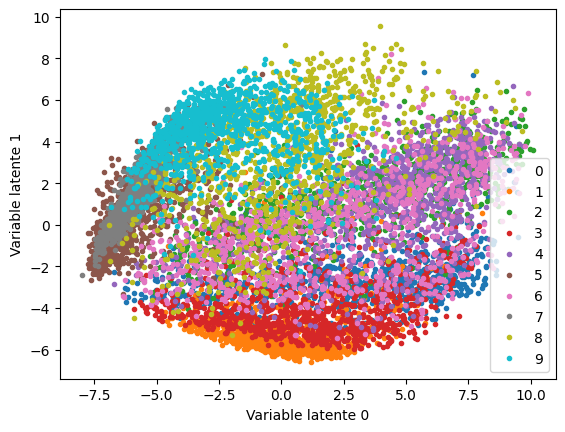

In [ ]:
for digito in range(10):
  aux = (y_test == digito) # filtro (selecciono solo imágenes de clase=digito)
  plt.plot(X_test_enc[aux, 0], X_test_enc[aux, 1], ".", label=digito)
  plt.xlabel("Variable latente 0")
  plt.ylabel("Variable latente 1")
plt.legend();

**Visualización del dataset en las 3 primeras dimensiones del espacio latente**

In [ ]:
configure_plotly_browser_state()

data = []
for digito in range(10):
  data.append(go.Scatter3d(x=X_test_enc[y_test==digito,0],
                           y=X_test_enc[y_test==digito,1],
                           z=X_test_enc[y_test==digito,2],
                           mode='markers', name=str(digito),
                           marker=dict(size=3, symbol="circle",
                                       opacity=0.9)))

layout = go.Layout(title='Espacio latente',
                   scene={"xaxis":{"title":"Variable latente 0"},
                          "yaxis":{"title":"Variable latente 1"},
                          "zaxis":{"title":"Variable latente 2"}})

py.iplot(go.Figure(data=data, layout=layout))

**Reconstrucción de las imágenes tras pasar por el autoencoder**

In [ ]:
# Descomprimo las imágenes con el decoder:
X_test_rec = ae.decode(X_test_enc)
X_test_rec.shape

(10000, 28, 28)

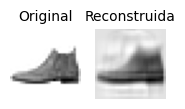

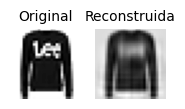

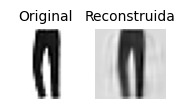

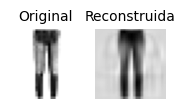

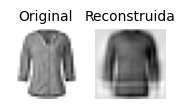

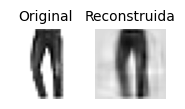

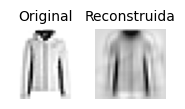

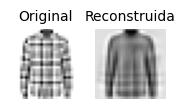

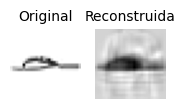

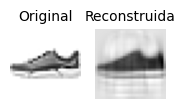

In [ ]:
plot_original_vs_reconstruida(X_test[:10], X_test_rec[:10])

## ¿Cuáles son las 10 imágenes más anómalas en test?

In [ ]:
errores_pixeles_signo = X_test - X_test_rec # a las im originales les resto las reconstruidas. error + en la img real hay info que no esta reconstruyendo. error - esta reconstruyendo algo en la imagen que en el original no esta
errores_pixeles_signo.shape

(10000, 28, 28)

In [ ]:
errores_pixeles = errores_pixeles_signo**2 #permite eliminarel signo
errores_pixeles.shape

(10000, 28, 28)

In [ ]:
errores = errores_pixeles.mean(axis=1).mean(axis=1) # calculo el ECM de reconstrucción por cada imagen, como son de 28 x 28 hay que hace el error medio por fila y columna
errores.shape

(10000,)

In [ ]:
inds = np.argsort(errores)[::-1] # Índices de imágenes ordenadas por error (de mayor a menor)
inds

array([9067, 1286, 7348, ..., 4469, 1395, 7610])

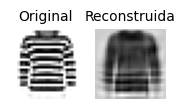

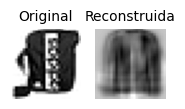

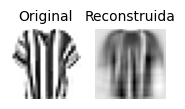

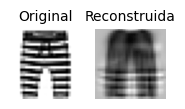

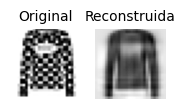

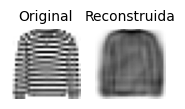

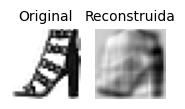

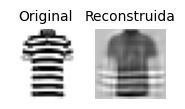

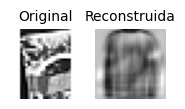

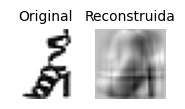

In [ ]:
plot_original_vs_reconstruida(X_test[inds[:10]], X_test_rec[inds[:10]])

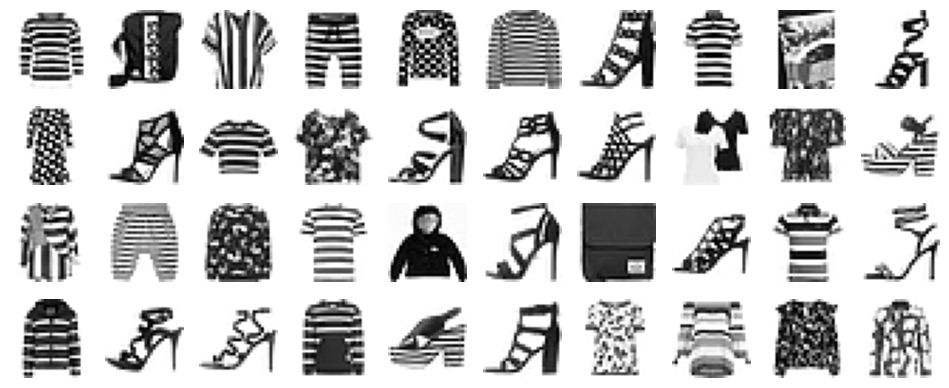

In [ ]:
plot_images(X_test[inds[:40]])

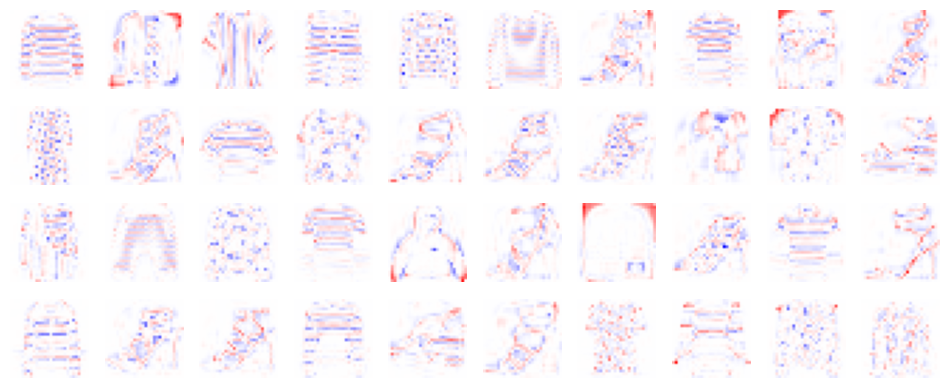

In [ ]:
show_errors(errores_pixeles_signo[inds[:40]]) # de esta forma represento los errores del modelo

## ¿Cuáles son las 10 imágenes menos anómalas en test?

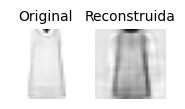

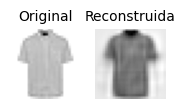

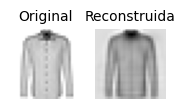

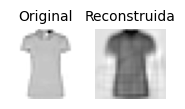

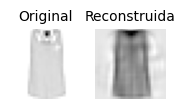

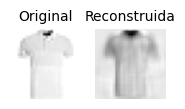

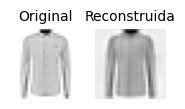

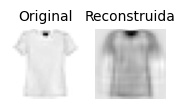

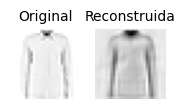

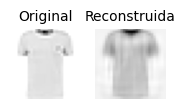

In [ ]:
plot_original_vs_reconstruida(X_test[inds[-10:]], X_test_rec[inds[-10:]])

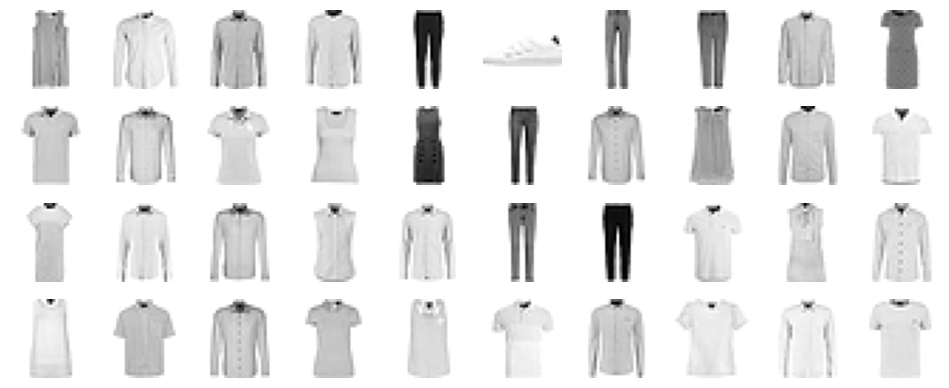

In [ ]:
plot_images(X_test[inds[-40:]])

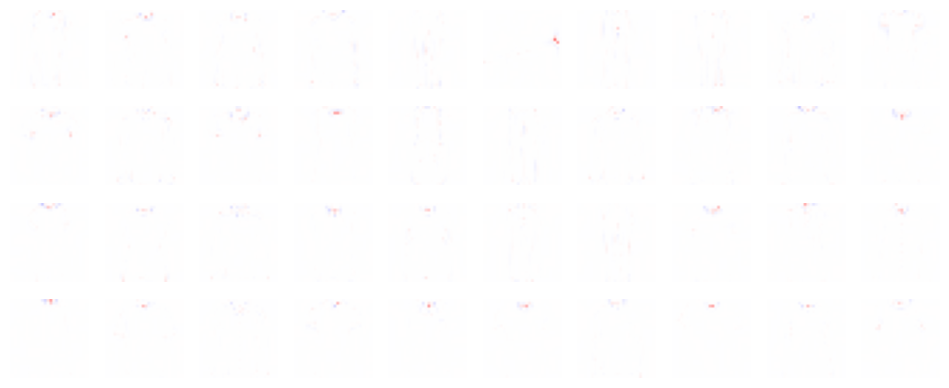

In [ ]:
show_errors(errores_pixeles_signo[inds[-40:]])

## Generación de imágenes nuevas

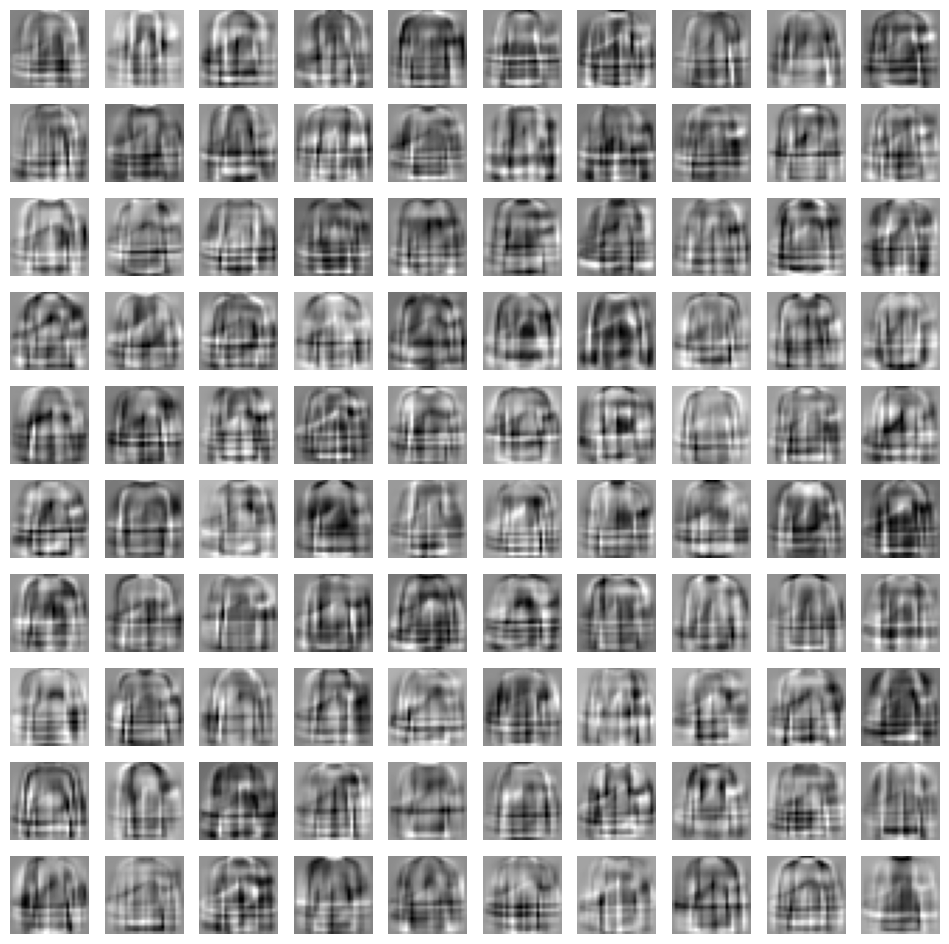

In [ ]:
n_digitos_nuevos = 100
input_aleatorio_decoder = 3*np.random.randn(n_digitos_nuevos, n_components)
nuevos = ae.decode(input_aleatorio_decoder)
plot_images(nuevos)